## Atividade 1
Crie um dataset que envolva apenas o indicador GDP e persista em um arquivo, sem as colunas "Indicator Name" e "Indicator Code"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# reduzir número de casas decimais dos floats
pd.set_option('display.precision', 2)

# remover notação científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

caminho = './'
arquivo = 'dataset_bancomundial.csv'

df_dados = pd.read_csv(caminho + arquivo, sep = ';', decimal = ',')

# filtrar ocorrencias de um único termo em uma coluna
filtro = ['GDP (Current USD)']
# filtrando apenas as linhas que contém o critério do filtro na coluna Indicator Name
df_gpd = df_dados.query("`Indicator Name` in @filtro")

print("Antes de remover haviam essas colunas.")
display(df_gpd.head(0))

df_gpd = df_gpd.drop(['Indicator Name', 'Indicator Code'], axis = 1)
print("Depois de removido há as seguintes colunas.")
display(df_gpd.head(0))

# gravando em um novo arquivo
df_gpd.to_csv('dataset_gpd_ex1.csv', sep = ';', decimal = ',')


Antes de remover haviam essas colunas.


,index,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013


Depois de removido há as seguintes colunas.


,index,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013


## Atividade 2
Selecione os países da América do Sul e crie um novo dataset, persistindo em arquivo

In [3]:
caminho = './'
arquivo = 'dataset_bancomundial_paises.csv'

filtro_paises_sul_americanos = ['ARG', 'BRA', 'BOL',  'CHL', 'COL', 'ECU', 'GUY', 'PER', 'PRY', 'SUR', 'URY', 'VEN']

# lendo o arquivo
df_paises = pd.read_csv(caminho + arquivo, sep = ';', decimal = ',')

# filtrar ocorrencias de varios termos em uma coluna
df_paises_sul_americanos = df_paises.query("`Country Code` in @filtro_paises_sul_americanos")


# criando arquivo com dataframe
df_paises_sul_americanos.to_csv('dataset_paises_sul_americanos_ex2.csv', sep = ';', decimal = ',')

df_paises_sul_americanos.head(4)

,index,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
6,6,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,The base year has changed to 2004.,Latin America & Caribbean,Upper middle income; based on FY13 income clas...,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey (MICS), 2011/12","Integrated household survey (IHS), 2012",Yes,2013,2002.00,2013.00,2011.00
21,21,BOL,Bolivia,Bolivia,Plurinational State of Bolivia,BO,Bolivian Boliviano,NaN,Latin America & Caribbean,Lower middle income; based on FY13 income clas...,...,Consolidated central government,General Data Dissemination System (GDDS),2012,"Demographic and Health Survey (DHS), 2008","Integrated household survey (IHS), 2012",NaN,2013,NaN,2013.00,2000.00
24,24,BRA,Brazil,Brazil,Federative Republic of Brazil,BR,Brazilian real,NaN,Latin America & Caribbean,Upper middle income; based on FY13 income clas...,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"World Health Survey (WHS), 2003","Integrated household survey (IHS), 2012",NaN,2006,2011.00,2013.00,2010.00
36,36,CHL,Chile,Chile,Republic of Chile,CL,Chilean peso,NaN,Latin America & Caribbean,Upper middle income; based on FY13 income clas...,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2012,NaN,"Integrated household survey (IHS), 2011",Yes,2007,NaN,2013.00,2006.00


## Atividade 3
Crie um gráfico de controle, considerando a média e uma amplitude de 2 vezes o desvio padrão da série com o GDP para todos os países da América do Sul;

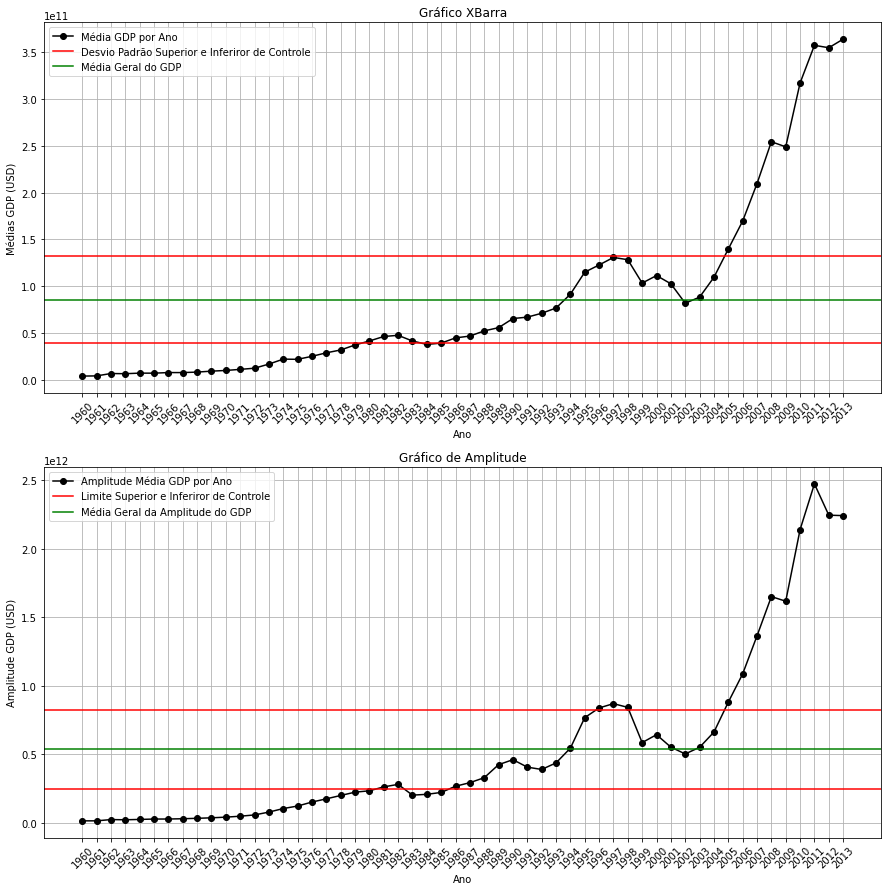

In [4]:

caminho = './'
arquivo_dados = 'dataset_gpd_ex1.csv'
arquivo_paises_sul_americanos = 'dataset_paises_sul_americanos_ex2.csv'


def lendo_arquivo(arquivo: str):
    return pd.read_csv(caminho + arquivo, sep=';', decimal=',')


df_dados = lendo_arquivo(arquivo_dados)
df_paises_sul_americanos = lendo_arquivo(arquivo_paises_sul_americanos)
filtro_cod_sul_americanos = df_paises_sul_americanos['Country Code']

# filtrando apenas as linhas que contém o critério do filtro na coluna Country Code
df_registros = df_dados.query("`Country Code` in @filtro_cod_sul_americanos")
df_registros.reset_index(inplace=True, drop=True)

# gravando arquivo csv separado com gdp apenas dos países sul_americanos
df_registros.to_csv(
    'dataset_gpd_paises_sul_americanos_ex3.csv', sep=';', decimal=',')

# deletando primeira coluna sem nome
df_registros = df_registros.iloc[:, 1:]

# apagando colunas
df_registros = df_registros.drop(
    ['index', 'Country Name', 'Country Code'], axis=1)

# médias anuais
medias_GDP = df_registros.mean(numeric_only=True, skipna=True, axis=0)

# amplitudes anuais
amplitudes_GDP = df_registros.max(numeric_only=True, skipna=True,
                                  axis=0) - df_registros.min(numeric_only=True, skipna=True, axis=0)

# desvio padrão anuais
std_GDP = df_registros.std(numeric_only=True, skipna=True, axis=0)

df_resultado = pd.DataFrame(
    {'Média': medias_GDP, 'Desvio': std_GDP, "Amplitude": amplitudes_GDP}).reset_index()

anos = df_resultado['index']
medias = df_resultado['Média']
desvios = df_resultado['Desvio']
amplitude = df_resultado['Amplitude']

media_medias = medias.mean()
media_amplitudes = amplitude.mean()
media_desvios_padrao = desvios.mean()

# Limites de Controle para o Gráfico X Barrado
# fórmula dos limites obtida do livro Douglas C. Montgomery Introdução ao Controle Estatístico da Qualidade, 7ª edição pág 164
# média +- Constante A2 * desvio padrão * 2 porque o enunciado do professor pede
# n > 25 o valor de A2 é 0.153
lsc_x = media_medias + 0.153 * media_desvios_padrao * 2
lm_x = media_medias
lic_x = media_medias - 0.153 * media_desvios_padrao * 2

# Plot x-bar and r charts
fig, axs = plt.subplots(2, figsize=(15, 15))

# x-bar chart
axs[0].plot(anos, medias, linestyle='-', marker='o', color='black')
axs[0].axhline(lsc_x, color='red')
axs[0].axhline(lm_x, color='green')
axs[0].axhline(lic_x, color='red')
axs[0].grid()
axs[0].set_title('Gráfico XBarra')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Médias GDP (USD)')
axs[0].xaxis.set_tick_params(rotation=45)
axs[0].legend(['Média GDP por Ano',
              'Desvio Padrão Superior e Inferiror de Controle', 'Média Geral do GDP'])

# Limites de Controle para o Gráfico R
# fórmula dos limites obtida do livro Douglas C. Montgomery Introdução ao Controle Estatístico da Qualidade, 7ª edição pág 164
# const d4 * amplitude
# const d3 * amplitude
# n > 25 o valor de d3 e d4 é 0.459 e 1.541 respectivamente
lsc_r = 1.541 * media_amplitudes
lm_r = media_amplitudes
lic_r = 0.459 * media_amplitudes

# r-chart
axs[1].plot(anos, amplitude, linestyle='-', marker='o', color='black')
axs[1].axhline(lsc_r, color='red')
axs[1].axhline(lm_r, color='green')
axs[1].axhline(lic_r, color='red')
axs[1].grid()
axs[1].set_title('Gráfico de Amplitude')
axs[1].set_xlabel('Ano')
axs[1].set_ylabel('Amplitude GDP (USD)')
axs[1].xaxis.set_tick_params(rotation=45)
axs[1].legend(['Amplitude Média GDP por Ano',
              'Limite Superior e Inferiror de Controle', 'Média Geral da Amplitude do GDP'])
plt.show()


## Exercício 4
Identifique os anos e os países que se encontram fora da faixa de controle;

In [166]:
# lsc_x = media_medias + 0.153 * media_desvios_padrao * 2
# lic_x = media_medias - 0.153 * media_desvios_padrao * 2
# acima_faixa_controle = df_registros.agg(lambda x: x >= lsc_x)
# display(acima_faixa_controle)
# abaixo_faixa_controle = df_registros.agg(lambda x: x <= lic_x)
# display(abaixo_faixa_controle)
print("Abaixo a lista de países com os respectivos anos em que ficaram fora dos limites de controle para o gráfico X-Barra.")

fora_faixa_controle = df_registros.apply(
    (lambda acima: acima >= lsc_x) or (lambda abaixo: abaixo <= lic_x))
# display(fora_faixa_controle)

# colocando rótulo com o código dos países utilizando o índice dos dois dataframes como chave
fora_faixa_controle = fora_faixa_controle.merge(
    filtro_cod_sul_americanos, left_index=True, right_index=True)

# setando o código dos países como
fora_faixa_controle.set_index('Country Code', inplace=True)

# resentando o índice coloca novamente Country Code como coluna
fora_faixa_controle.reset_index(inplace=True)

# mostrar os anos em que cada país ficou fora dos limites de controle
display(fora_faixa_controle)

for pais in filtro_cod_sul_americanos:
    linha = fora_faixa_controle[fora_faixa_controle['Country Code'] == pais]
    anos = linha[linha[:] == True].dropna(axis=1).head(0)
    quant = anos.shape[1]
    display(pais + " - Quantidade de anos fora da faixa de controle: " +  str(quant), anos)


Abaixo a lista de países com os respectivos anos em que ficaram fora dos limites de controle para o gráfico X-Barra.


,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,ARG,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,BOL,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,BRA,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,CHL,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True
4,COL,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,True
5,ECU,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,GUY,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,PRY,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,PER,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
9,SUR,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


'ARG - Quantidade de anos fora da faixa de controle: 22'

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013


'BOL - Quantidade de anos fora da faixa de controle: 0'

""


'BRA - Quantidade de anos fora da faixa de controle: 38'

,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013


'CHL - Quantidade de anos fora da faixa de controle: 8'

,2006,2007,2008,2009,2010,2011,2012,2013


'COL - Quantidade de anos fora da faixa de controle: 9'

,2005,2006,2007,2008,2009,2010,2011,2012,2013


'ECU - Quantidade de anos fora da faixa de controle: 0'

""


'GUY - Quantidade de anos fora da faixa de controle: 0'

""


'PRY - Quantidade de anos fora da faixa de controle: 0'

""


'PER - Quantidade de anos fora da faixa de controle: 4'

,2010,2011,2012,2013


'SUR - Quantidade de anos fora da faixa de controle: 0'

""


'URY - Quantidade de anos fora da faixa de controle: 0'

""


'VEN - Quantidade de anos fora da faixa de controle: 9'

,2005,2006,2007,2008,2009,2010,2011,2012,2013
